<a href="https://colab.research.google.com/github/Olga225/ITMO_Data_Analysis/blob/main/Task1_Lollipops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
url = "https://raw.githubusercontent.com/Olga225/ITMO_Data_Analysis/refs/heads/main/Lollipops.dat"
df = pd.read_csv(url, sep=";")

# Исследование набор данных

Просмотрим основную информацию о наборе данных и первые строки.

In [3]:
print(df.describe())
print(df.head())

               V1          V2          V3          V4          V5          V6  \
count  338.000000  338.000000  338.000000  338.000000  338.000000  338.000000   
mean     3.544379    3.526627    3.517751    3.411243    3.207101    3.204142   
std      0.955748    0.956410    0.990150    0.992311    0.867314    0.869725   
min      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
25%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
50%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
75%      5.000000    5.000000    5.000000    4.000000    3.000000    3.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               V7          V8          V9         V10         V11  
count  338.000000  338.000000  338.000000  338.000000  338.000000  
mean     3.254438    3.289941    3.603550    3.550296    3.565089  
std      0.844107    0.821784    0.969682    0.927082    0.942042 

# Иерархический метод

Проведем кластеризацию.

In [4]:
link = linkage(df, 'ward', 'euclidean')
print(type(link))
print(link[:15])

<class 'numpy.ndarray'>
[[  0.   4.   0.   2.]
 [  1.   3.   0.   2.]
 [  2.   6.   0.   2.]
 [  5. 339.   0.   3.]
 [ 32. 338.   0.   3.]
 [  7. 341.   0.   4.]
 [  8.  30.   0.   2.]
 [ 12.  15.   0.   2.]
 [ 16. 345.   0.   3.]
 [ 17. 346.   0.   4.]
 [ 18. 347.   0.   5.]
 [ 19. 348.   0.   6.]
 [ 20. 349.   0.   7.]
 [ 21. 350.   0.   8.]
 [ 23. 351.   0.   9.]]


Построим дендрограмму.

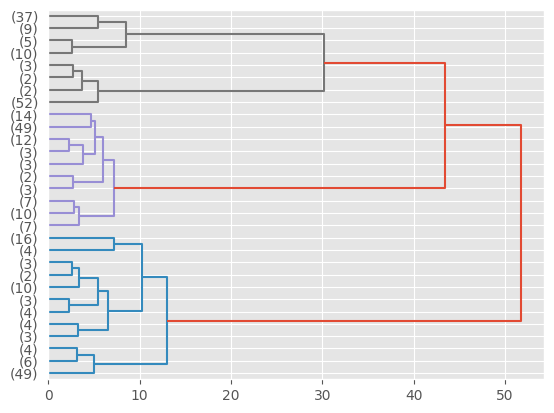

In [5]:
dn = dendrogram(link,
                labels=df.index.tolist(),
                leaf_font_size = 10,
                truncate_mode='lastp',
                orientation = "right",
                leaf_rotation=0.)

Оценим расстояние между кластерами методом "каменистой осыпи". В данных много объектов с нудевым расстояниям между ними - для удобства интерпретации построим график без их учета.

Text(0, 0.5, 'Расстояние')

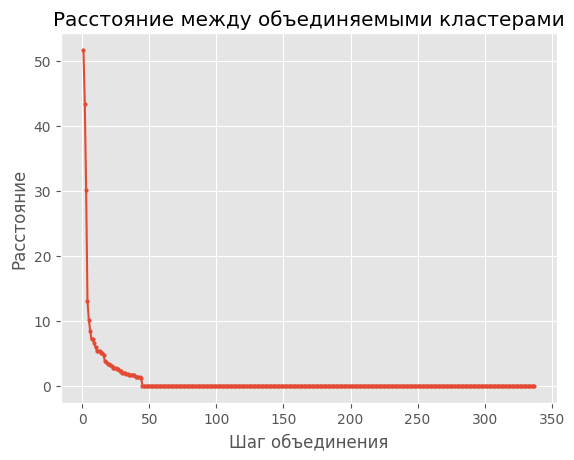

In [6]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Text(0, 0.5, 'Расстояние')

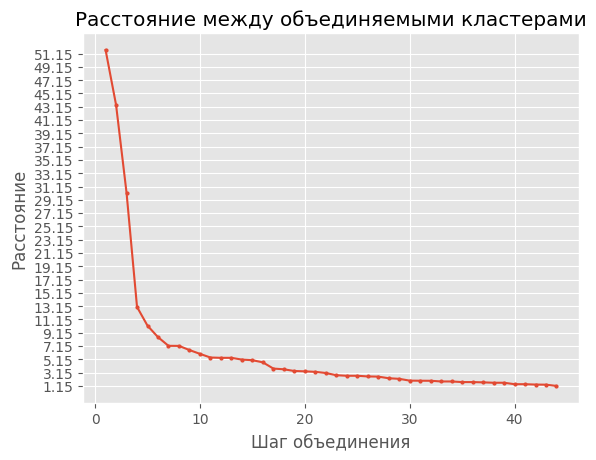

In [7]:
dist = link[:, 2]
dist_rev = list(filter(lambda x: x != 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 2))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Излом происходит после расстояния 13.15. Установим порог по результатам анализа дендрограммы и "каменистой осыпи".

In [8]:
h = 14

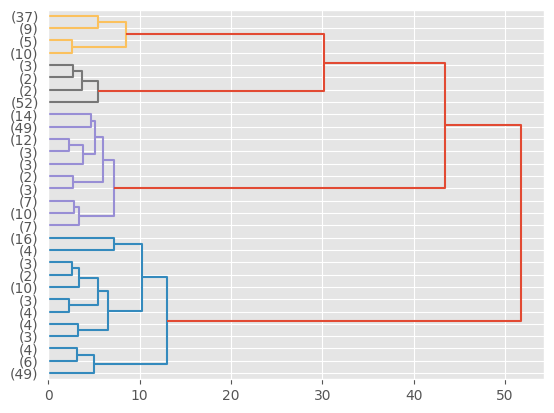

In [9]:
dn = dendrogram(link,
                labels=df.index.tolist(),
                leaf_font_size = 10,
                truncate_mode='lastp',
                orientation = "right",
                leaf_rotation=0.,
                color_threshold = h)

Добавим в набор данных информацию о кластерах.

In [10]:
df['cluster'] = fcluster(link, h, criterion='distance')

In [11]:
print(df.head())

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
0   4   5   5   5   3   3   3   3   3    3    3        2
1   5   4   5   5   3   3   3   3   3    3    3        2
2   5   5   4   5   3   3   3   3   3    3    3        2
3   5   4   5   5   3   3   3   3   3    3    3        2
4   4   5   5   5   3   3   3   3   3    3    3        2


In [12]:
df.groupby('cluster').size()

,0
cluster,
1,108
2,110
3,59
4,61


Посмотрим средние значения признаков для каждого кластера.

In [13]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Интерпретация:

**Кластер 1.** Люди, которые считают леденцы полезными для здоровья.

Их оценки по всем вопросам, кроме V9, V10 и V11 (связаны со снятием различных симптомов болезни), близки к медианным (3.0), а по V9, V10 и V11 повышены почти до макисмального (5.0). Скорее всего, люди данной категории воспринимают леденцы как способ облегчить симптоматику плохого самочувствия.

**Кластер 2.** Люди, которые используют леденцы как способ справиться с запахом изо рта.

Их оценки по всем вопросам, кроме V1-V4 (связаны с освежением дыхания и повышением уверенности), близки к медианным, а по V1-V4 повышены почти до макисмального. Скорее всего, люди данной категории едят леденцы чтобы ощутить свежесть дыхания.

**Кластер 3.** Люди, которые используют леденцы для концентрации.

Их оценки по всем вопросам, кроме V7 и V8 (связаны с концентрацией), близки к медианным, а по V7 и V8 повышены почти до макисмального. Скорее всего, люди данной категории едят леденцы чтобы отвлечься и сконцентрироваться на задаче.


**Кластер 4.** Люди, которым следят за питанием.

Их оценки по всем вопросам, кроме V5 и V6 (связаны с вкусовым эффектом), близки к медианным, а по V5 и V6 повышены почти до макисмального. Скорее всего, люди данной категории едят леденцы, чтобы преодолеть желание сладкого и как заменитель "вредной" еды.

# K-Means

Подберем число кластеров перебором от 1 до 10 включительно и построением "каменистой осыпи". Наблюдаем ожидаемый после иерархической кластеризации излом на отметке четырех кластеров. В дальнейшем будет использоваться число кластеров 4.

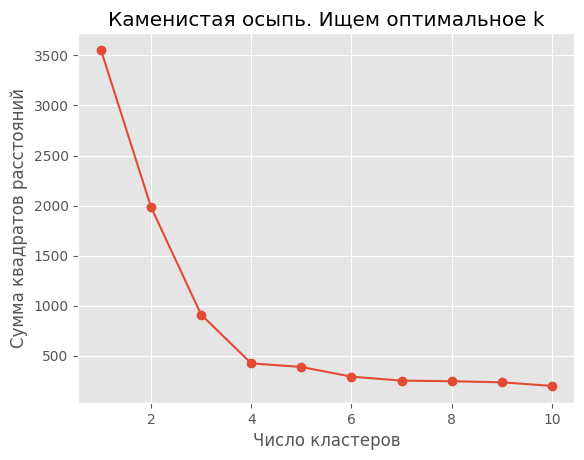

In [14]:
K = range(1, 11)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Построим и обучим модель (гиперпараметры взяты по умолчанию).



In [15]:
model = KMeans(n_clusters=4, random_state=42, max_iter=300, init = 'k-means++', n_init='auto')
model.fit(df)

KMeans(n_clusters=4, random_state=42)

Посмотрим информацию о кластеризации и получившихся результатах.

In [16]:
print("Потребовавшиеся итерации", model.n_iter_)
print("Результаты кластеризации", model.labels_)
print("Центры кластеров", model.cluster_centers_)

Потребовавшиеся итерации 2
Результаты кластеризации [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
Центры кластеров [[2.82407407 2.83333333 2.76851852 2.62037037 2.61111111 2.58333333
  2.75       2.91666667 4.9537037  4.81481481 4.86111111 1.        ]
 [3.         2.96610169 2.96610169 2.91525424 2.91525424 2.94915254
  4.91525424 4.91525424 3.         3.  

In [17]:
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
1,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Интерпретация аналогична интерпретации иерархического анализа с точностью до порядка кластеров.